# Logistic regression with for loops

This is an implementation of the logistic regression. batch gradient descent is used to fit the model paramaters

### import modules

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm


%matplotlib inline
pd.set_option('max.rows', None)


### read data

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
feats = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

### impute Age NA values with mean  

In [5]:

feats.Age = feats.Age.fillna(data.Age.mean())

/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [6]:
feats.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


the features x are a n diensional vector:
$$x \in \mathbb{R}^{n}$$
    
the weights w are a n dimensional vector
$$w \in \mathbb{R}^{n}$$
z is a linear combination of the weihts an feature values such that:

$$z \in w^{T}x$$
    
a s the logistic function where:

$$y = a(z)$$

$$a = \frac{1}{1+exp{-z}}$$
    


In [7]:
def sigmoid(feature_vector, weights):
    
    '''
    takes in vector of feature values and vector of weights and computes output from logistic function
    
    '''
    
    # calculate 'z'
    linear_combination = np.dot(feature_vector, weights)
    
    # input 'z' into logistic function
    function_output = 1 / (1+np.exp(-linear_combination))
    
    return(function_output)
    

### fit logistic function with batch gradient descent

loss function is $$ L(w, y) = (-[ylog(y)+(1-y)log(1-y)]$$
cost function is $$ J = \frac{1}{m}\sum_{i=1}^{m} L(w, y)$$
batch gradient descent algorithm:

$$repeat\, until\, convergence$$
$$\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\{$$
$$w := w - \alpha\frac{\partial{J}}{\partial{w_j}}$$
  $$\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\}$$


$$\frac{\partial{L}}{\partial{w_j}} = \frac{\partial{z}}{\partial{w_j}}*\frac{\partial{a}}{\partial{z}}*\frac{\partial{L}}{\partial{a}}$$
which means one can calculate $\frac{\partial{L}}{\partial{w_j}}$ int the following way
$$\frac{\partial{L}}{\partial{w_j}} = (a-y)*X_j$$

In the below block of code  $\frac{\partial{L}}{\partial{w_j}}$ is represented with 'dw'

In [32]:
def logisticRegression(features, y, alpha = 0.05, totalIterations=100):

    '''
    fits logistic regression model to data with batch gradient descent
    
    features: pandas dataframe containing features
    y: pandas series containing labels
    alpha: learning rate
    totalIterations: number of iterations of batch gradient descent
    
    '''

    X = np.array(features.T)
    X = np.insert(arr = X, values = np.ones(X.shape[1]), obj = 0, axis = 0)
    Y = np.array(y)
################################################################## initialise lists to store loss and cost function values   
    loss_function_values = []
    cost_function_values =[]
################################################################## initialise dictionaries 

    
################################################################## set up arrays
    old_params = np.zeros((features.shape[1])+1)
    new_params = np.zeros(features.shape[1]+1)
    dw = np.zeros(features.shape[1]+1)
    

################################################################## set up arrays


################################################################## loop through data 
    for counter in tqdm(range(totalIterations)):
        
        #reset dw to zeros
        dw = np.zeros(features.shape[1]+1)
        #update old paramaters with new paramaters defined from previous iteration
        old_params = new_params.copy()
        new_params = np.zeros(features.shape[1]+1)
        print('X')
        print(X.shape)
        print(old_params)
        print(dw)
        print(new_params)
        #Create vector Z which holds linear combinations of features for all observations
        Z = np.dot(old_params.T, X)
        #create vector A which holds outputs from logistic function for all linear combinations of features in Z
        A = 1 / (1+np.exp(-Z))
        #create vector A containing all errors
        E = np.array([A - Y])

################################################################## update dw
        #record all average dw values for all features
        dw = np.dot(E, X.T).sum(axis = 0)
        average_dw = dw/X.shape[1]    
################################################################## update dw


################################################################## record loss function
            
        loss_function_outputs = -(Y*(np.log(A))+((1-Y)*np.log(1-A)))
        cost_function_output = sum(loss_function_outputs)/X.shape[1]
        cost_function_values.append(cost_function_output)
################################################################## record loss function  


################################################################## update feature weights
        new_params = old_params-alpha*(average_dw)
################################################################## update feature weights

    return(new_params, cost_function_values)

In [25]:
test = np.zeros((feats.shape[1])-1)

In [26]:
test

array([0., 0., 0., 0.])

In [33]:
weights, cost_function_outputs = logisticRegression(features = feats, y = data['Survived'], alpha = 0.003, totalIterations=100)

100%|██████████| 100/100 [00:00<00:00, 715.85it/s]

X
(6, 891)
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
X
(6, 891)
[-3.48484848e-04 -1.21717172e-03 -1.16731744e-02 -2.39057239e-04
 -3.70370370e-05  7.42173316e-03]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
X
(6, 891)
[-0.00060767 -0.00214204 -0.01956524 -0.00050795 -0.00010095  0.00705295]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
X
(6, 891)
[-0.00069111 -0.00268422 -0.02135102 -0.00069936 -0.00010618  0.01267347]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
X
(6, 891)
[-0.00085061 -0.00333517 -0.02541835 -0.00096842 -0.00016934  0.01086268]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
X
(6, 891)
[-0.00089294 -0.00374485 -0.02555038 -0.00117257 -0.000185    0.0140476 ]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
X
(6, 891)
[-0.00099279 -0.00425092 -0.02748789 -0.00142584 -0.00023607  0.01306729]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
X
(6, 891)
[-0.00103587 -0.0046403  -0.02753319 -0.00164664 -0.00026383  0.0144873 ]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
X
(6, 891)
[-0.00110379 -0.00

### Fitted paramater values

In [ ]:
print('model weights are {0}'.format(weights))

### plot showing output of cost function for each iteration of gradient descent

There is a steady yet slow decrease in the value of the cost function. the rate of paramater fitting can be dramatically increased by vectorisation

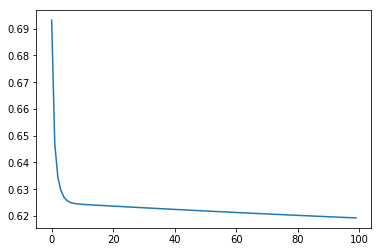

In [34]:
a = pd.Series(cost_function_outputs) 
a.plot()

### function to predict survival based on feature values

In [ ]:
def predict(data, weights, x_cols, sensitivity = 0.5):
    
    '''
    predicts survival using fitted logistic regression model'''
    
    results = []
    for row_number in range(data.shape[0]):

        #loops through data and stores the feature vector and label
        feature_vector = np.array(list(data.iloc[row_number][x_cols]))
        feature_vector = np.insert(feature_vector, obj = [0], values = 1)
  
    
        linear_combination = np.dot(feature_vector, weights)
    
        function_output = 1 / (1+np.exp(-linear_combination))
        
        if function_output >= sensitivity:
            results.append(1)
        else:
            results.append(0)
        
    return(results)

### predict using fitted paramaters

In [ ]:
results = predict(data, weights, x_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], sensitivity=0.5)

In [ ]:
data['model_prediction'] = pd.Series(results)

In [ ]:
print('model accuracy is {0} %'.format(100*(data[data['Survived'] == data['model_prediction']].shape[0]/data.shape[0])))

In [ ]:
data